<a href="https://colab.research.google.com/github/ThamaraCrispim/Panda_Python/blob/main/Trabalho_rec_2024_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Impacto da Aromatização com Lavanda: Uma Análise Comparativa entre Ambientes Aromatizados e Sem Aroma no Restaurante Recanto do Sabor

**Aluno(a):** Thamara Gabriella Crispim Bezerra - 802666


as imports

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd


In [ ]:
from google.colab import drive


Montar o Google Drive no ambiente do Colab


In [ ]:

dadosthamara = pd.read_csv("/content/drive/MyDrive/Estela 2024 1/Dados Thamara.xls - goodsmells.csv")


# Introdução

Em um cenário altamente competitivo no setor de restaurantes, onde a diferenciação é essencial para o sucesso e a fidelização dos clientes, Paulo, proprietário de uma franquia de restaurantes, estava sempre em busca de novidades para proporcionar uma experiência memorável aos seus frequentadores. Ao ler um artigo na revista **Sabores & Aromas** sobre os benefícios da lavanda, que são relaxamento, melhoria do ambiente, mascaramento de odores, estímulo ao apetite e criação de uma marca sensorial única e memorável, Paulo, conhecido por sua inclinação pioneira em adotar inovações, viu uma oportunidade de aprimorar a experiência gastronômica oferecida em seus estabelecimentos.

Confiante no potencial dessa abordagem, Paulo decidiu conduzir sua própria pesquisa, contratando um consultor estatístico, para garantir a eficácia e a viabilidade dessa iniciativa. O restaurante escolhido para a realização do estudo foi o Recanto do Sabor, considerado o melhor da região e localizado na cidade de São Carlos. Além disso, o restaurante possui quatro salas similares, o que facilita a realização da pesquisa em condições controladas.

Com isso, dois desses ambientes foram designados para receber a aplicação do aroma de lavanda, enquanto os outros dois permaneceram sem aroma. Ao longo de seis noites.

# Objetivo

Após discussões detalhadas entre o consultor e Paulo, ficou decidido que o objetivo central da pesquisa seria explorar minuciosamente a resposta dos clientes do restaurante Recanto do Sabor ao aroma de lavanda. Eles estão interessados em entender como esse aroma específico pode afetar não apenas a percepção sensorial dos clientes, mas também seu comportamento enquanto desfrutam da experiência gastronômica oferecida pelo estabelecimento. A equipe está ansiosa para analisar como a introdução desse aroma influencia a duração da permanência dos clientes no restaurante, bem como seu nível geral de satisfação. Essas informações detalhadas serão essenciais para guiar as estratégias futuras de diferenciação e aprimoramento da experiência oferecida pelo Recanto do Sabor.

# Material

Foram fornecidos dados relativos a 88 clientes do restaurante Recanto do Sabor durante 6 noites. Esses dados incluem informações sobre a presença ou não do aroma de lavanda, o tempo de permanência dos clientes no restaurante e os gastos em reais de cada cliente. A variável 'aroma' indica se o aroma específico estava presente ou não no restaurante e é uma medida qualitativa nominal.

A variável 'tempo' representa a quantidade de minutos que cada cliente passou no restaurante ao longo das 6 noites e é considerada uma medida quantitativa contínua. A variável 'reais' representa o valor gasto em reais por cada cliente durante suas visitas ao longo das 6 noites e também é uma medida quantitativa contínua. Os dados estão parcialmente representados na Tabela 1.

### Tabela 1.1 Dados dos Clientes do Restaurante Recanto do Sabor





In [ ]:
# Exibindo todos os dados
print("dados")
display(dadosthamara)

dados


,aroma,Tempo,reais,Unnamed: 3
0,lavanda,92,219,NaN
1,lavanda,126,185,NaN
2,lavanda,114,223,...
3,lavanda,106,219,NaN
4,lavanda,89,185,NaN
...,...,...,...,...
83,sem aroma,118,185,NaN
84,sem aroma,87,159,NaN
85,sem aroma,101,255,NaN
86,sem aroma,75,129,NaN


In [ ]:
# Verificando se há valores nulos no DataFrame dadosthamara
valores_nulos = dadosthamara.isnull().sum()

# Exibindo os valores nulos
print("Valores Nulos no DataFrame:")
print(valores_nulos)

Valores Nulos no DataFrame:
aroma          0
Tempo          0
reais          0
Unnamed: 3    87
dtype: int64


In [ ]:
# Remova a coluna 'Unnamed: 3' se não for necessária
dadosthamara.drop(columns=['Unnamed: 3'], inplace=True)



In [ ]:
# Listando as colunas presentes no DataFrame
print("Colunas presentes no DataFrame:")
print(dadosthamara.columns)


Colunas presentes no DataFrame:
Index(['aroma', 'Tempo', 'reais'], dtype='object')


In [ ]:
print("Número de variáveis no banco de dados:", dadosthamara.shape[1])
print("Número de observações no banco de dados:", dadosthamara.shape[0])



Número de variáveis no banco de dados: 3
Número de observações no banco de dados: 88


# Metodologia

Para começar, o consultor classificou as variáveis para entender melhor quais ferramentas seriam mais adequadas para a análise. Para as variáveis quantitativas, que incluem o tempo de permanência no restaurante e o dinheiro gasto no próprio, o consultor utilizou medidas resumo de variabilidade, como média, desvios e variâncias, para resumir as características principais do conjunto de dados. Além disso, foram utilizadas medidas resumo de centro, como quartis, mediana e intervalo interquartil, para analisar o comportamento dos dados tanto na tabela quanto nos gráficos.

Os gráficos escolhidos foram os boxplots para comparar variáveis qualitativas com quantitativas e gráficos de dispersão para variáveis quantitativas. Se necessário, será utilizado o Coeficiente de Correlação Linear de Pearson (corr(x,y)) para analisar a relação entre o tempo em minutos e a quantidade de reais gastos no restaurante com Lavanda ou sem aroma.

## 4.1 - Boxplot

O boxplot, também conhecido como diagrama de caixa, é um gráfico que permite visualizar a distribuição e valores discrepantes dos dados. Ele é composto por cinco elementos: a mediana, os quartis (Q1 e Q3), limite inferior e superior (LI e LS, respectivamente) e os valores discrepantes (outliers).

- **Mediana:** É o valor que divide o conjunto de dados em duas partes iguais.
- **Quartis:** São os valores que dividem o conjunto de dados em quatro partes iguais.
- **Limite Superior e Inferior:** São fornecidos, respectivamente, por Q3 + 1,5(IIQ) e Q1 - 1,5(IIQ), onde o IIQ é o intervalo interquartil, que é a diferença entre o terceiro e o primeiro quartil.
- **Valores Discrepantes:** São aqueles que são considerados atípicos dos demais valores.

## 4.2 - Gráfico de Dispersão

Um gráfico de dispersão é usado para mostrar a relação entre duas variáveis quantitativas do mesmo grupo. Se os pontos formarem uma linha reta inclinada para cima, isso indica que as duas variáveis estão aumentando juntas. Se a linha for inclinada para baixo, uma variável está aumentando enquanto a outra está diminuindo. Caso a nuvem de pontos esteja espalhada sem formar uma linha, não há uma relação linear entre as variáveis.

Para avaliar essa dependência, usamos o Coeficiente de Correlação Linear de Pearson (representado por corr(x,y) ou r), calculado da seguinte maneira:

\[ r = \frac{\sum_{i=1}^{n} (x_i y_i) - n \overline{x} \overline{y}}{\sqrt{(\sum_{i=1}^{n} x_i^2 - n \overline{x}^2) (\sum_{i=1}^{n} y_i^2 - n \overline{y}^2)}} = \frac{\text{cov}(x,y)}{\text{dp}(x) \cdot \text{dp}(y)} \]

Onde:
- \[ \text{cov}(x,y) = \frac{\sum_{i=1}^{n} (x_i y_i) - n \overline{x} \overline{y}}{n - 1} \]
- \[ \text{dp}(x) = \sqrt{\frac{\sum_{i=1}^{n} x_i^2 - n \overline{x}^2}{n - 1}} \]
- \[ \text{dp}(y) = \sqrt{\frac{\sum_{i=1}^{n} y_i^2 - n \overline{y}^2}{n - 1}} \]

Onde:
- \( x \): variável independente
- \( y \): variável dependente
- \( \text{cov}(x,y) \): covariância de x e y
- \( \text{dp}(x) \): desvio padrão de x
- \( \text{dp}(y) \): desvio padrão de y
- \( \overline{x} \): média de x
- \( \overline{y} \): média de y
- \( n \): número de observações

Caso seja possível calcular essa correlação, será possível criar o seguinte modelo linear:

\[ y_i = a + b x_i \]

Em que:
- \( a \) representa o valor esperado para a variável dependente \( y_i \) quando \( x = 0 \)
- \( b \) representa o acréscimo esperado na variável resposta \( y \) quando a variável explicativa \( x_i \) é acrescida em uma unidade

As constantes \( a \) e \( b \) são calculadas da seguinte forma:
\[ b = \frac{\sum_{i=1}^{n} (x_i y_i) - n \overline{x} \overline{y}}{\sum_{i=1}^{n} x_i^2 - n \overline{x}^2} = r \cdot \frac{\text{dp}(y)}{\text{dp}(x)} \]
\[ a = \overline{y} - b \overline{x} \]


**Resultados**

In [ ]:
# Filtrando as observações onde 'aroma' é 'sem aroma'
dados_sem_aroma = dadosthamara[dadosthamara['aroma'] == 'sem aroma']

# Selecionando as colunas 'Tempo' e 'reais' para as observações onde 'aroma' é 'sem aroma'
variaveis_sem_aroma = dados_sem_aroma[['Tempo', 'reais']]

# Calculando medidas de resumo para as variáveis 'Tempo' e 'reais'
medidas_resumo_sem_aroma = variaveis_sem_aroma.describe().round(2)

# Calculando mediana
mediana_sem_aroma = variaveis_sem_aroma.median().round(2)

# Calculando quartis
Q1_sem_aroma = variaveis_sem_aroma.quantile(0.25).round(2)
Q3_sem_aroma = variaveis_sem_aroma.quantile(0.75).round(2)

# Calculando variância e desvio padrão
variancia_sem_aroma = variaveis_sem_aroma.var().round(2)
desvio_padrao_sem_aroma = variaveis_sem_aroma.std().round(2)

# Calculando Coeficiente de Variação (CV)
CV_sem_aroma = ((desvio_padrao_sem_aroma / medidas_resumo_sem_aroma.loc['mean']) * 100).round(2)
print(CV_sem_aroma)
# Calculando o Interquartile Range (IIQ)
IIQ_sem_aroma = (Q3_sem_aroma - Q1_sem_aroma).round(2)

# Calculando limites superior e inferior para identificar outliers
limite_superior_sem_aroma = (Q3_sem_aroma + 1.5 * IIQ_sem_aroma).round(2)
limite_inferior_sem_aroma = (Q1_sem_aroma - 1.5 * IIQ_sem_aroma).round(2)

# Exibindo todas as medidas de resumo para as pessoas que indicaram 'sem aroma'
print("Medidas de resumo para 'Tempo' e 'reais' das pessoas que indicaram 'sem aroma':")
print(medidas_resumo_sem_aroma)
print("\nMediana:")
print(mediana_sem_aroma)
print("\nQuartis:")
print("Q1:\n", Q1_sem_aroma)
print("Q3:\n", Q3_sem_aroma)
print("\nVariância:")
print(variancia_sem_aroma)
print("\nDesvio Padrão:")
print(desvio_padrao_sem_aroma)
print("\nCoeficiente de Variação (CV):")
print(CV_sem_aroma)
print("\nIntervalo Interquartil (IIQ):")
print(IIQ_sem_aroma)
print("\nLimites para identificação de outliers:")
print("Limite Superior:\n", limite_superior_sem_aroma)
print("Limite Inferior:\n", limite_inferior_sem_aroma)


Tempo    17.32
reais    13.84
dtype: float64
Medidas de resumo para 'Tempo' e 'reais' das pessoas que indicaram 'sem aroma':
        Tempo   reais
count   47.00   47.00
mean    90.23  178.87
std     15.63   24.76
min     56.00  129.00
25%     81.00  159.00
50%     91.00  185.00
75%    102.00  185.00
max    121.00  259.00

Mediana:
Tempo     91.0
reais    185.0
dtype: float64

Quartis:
Q1:
 Tempo     81.0
reais    159.0
Name: 0.25, dtype: float64
Q3:
 Tempo    102.0
reais    185.0
Name: 0.75, dtype: float64

Variância:
Tempo    244.27
reais    613.11
dtype: float64

Desvio Padrão:
Tempo    15.63
reais    24.76
dtype: float64

Coeficiente de Variação (CV):
Tempo    17.32
reais    13.84
dtype: float64

Intervalo Interquartil (IIQ):
Tempo    21.0
reais    26.0
dtype: float64

Limites para identificação de outliers:
Limite Superior:
 Tempo    133.5
reais    224.0
dtype: float64
Limite Inferior:
 Tempo     49.5
reais    120.0
dtype: float64


In [ ]:
# Filtrando as observações onde 'aroma' é 'lavanda'
dados_lavada = dadosthamara[dadosthamara['aroma'] == 'lavanda']

# Selecionando as colunas 'Tempo' e 'reais' para as observações onde 'aroma' é 'lavanda'
variaveis_selecionadas = dados_lavada[['Tempo', 'reais']]

# Calculando medidas de resumo para as variáveis 'Tempo' e 'reais'
medidas_resumo = variaveis_selecionadas.describe().round(2)

# Calculando mediana
mediana = variaveis_selecionadas.median().round(2)

# Calculando quartis
Q1 = variaveis_selecionadas.quantile(0.25).round(2)
Q3 = variaveis_selecionadas.quantile(0.75).round(2)

# Calculando variância e desvio padrão
variancia = variaveis_selecionadas.var().round(2)
desvio_padrao = variaveis_selecionadas.std().round(2)

# Calculando Coeficiente de Variação (CV)
CV = ((desvio_padrao / medidas_resumo.loc['mean']) * 100).round(2)

# Calculando o Interquartile Range (IIQ)
IIQ = (Q3 - Q1).round(2)

# Calculando limites superior e inferior para identificar outliers
limite_superior = (Q3 + 1.5 * IIQ).round(2)
limite_inferior = (Q1 - 1.5 * IIQ).round(2)

# Exibindo todas as medidas de resumo para as pessoas que usaram lavada
print("Medidas de resumo para 'Tempo' e 'reais' das pessoas que usaram lavada:")
print(medidas_resumo)
print("\nMediana:")
print(mediana)
print("\nQuartis:")
print("Q1:\n", Q1)
print("Q3:\n", Q3)
print("\nVariância:")
print(variancia)
print("\nDesvio Padrão:")
print(desvio_padrao)
print("\nCoeficiente de Variação (CV):")
print(CV)
print("\nIntervalo Interquartil (IIQ):")
print(IIQ)
print("\nLimites para identificação de outliers:")
print("Limite Superior:\n", limite_superior)
print("Limite Inferior:\n", limite_inferior)




Medidas de resumo para 'Tempo' e 'reais' das pessoas que usaram lavada:
       Tempo   reais
count   41.0   41.00
mean   102.0  201.66
std     14.3   26.42
min     74.0  159.00
25%     93.0  185.00
50%    104.0  185.00
75%    109.0  219.00
max    137.0  259.00

Mediana:
Tempo    104.0
reais    185.0
dtype: float64

Quartis:
Q1:
 Tempo     93.0
reais    185.0
Name: 0.25, dtype: float64
Q3:
 Tempo    109.0
reais    219.0
Name: 0.75, dtype: float64

Variância:
Tempo    204.50
reais    697.98
dtype: float64

Desvio Padrão:
Tempo    14.30
reais    26.42
dtype: float64

Coeficiente de Variação (CV):
Tempo    14.02
reais    13.10
dtype: float64

Intervalo Interquartil (IIQ):
Tempo    16.0
reais    34.0
dtype: float64

Limites para identificação de outliers:
Limite Superior:
 Tempo    133.0
reais    270.0
dtype: float64
Limite Inferior:
 Tempo     69.0
reais    134.0
dtype: float64


# Tabela 1.2: Tabela de medidas resumo de centro e variabilidade do tempo de permanência dos clientes no restaurante Recanto do Sabor, nos ambientes com lavanda e sem aroma

| Variáveis                                             | Min   | Q1    | Med  | Média | Q3    | Máx   | CV   | IIQ | S    | S²     |
|-------------------------------------------------------|-------|-------|------|-------|-------|-------|------|-----|------|--------|
| Tempo de permanência do cliente no ambiente com lavanda  | 74,00 | 93,00 | 104,00 | 102,0 | 109,00 | 137,00 | 14,02 | 16  | 14,3 | 204,50 |
| Tempo de permanência do cliente no ambiente sem aroma | 56,00 | 81,00 | 91,00 | 90,23 | 102,00 | 121,00 | 17,32 | 21,0 | 15,63 | 244,27 |


### Análise do Tempo com Lavanda:

No ambiente com lavanda, o tempo médio de permanência dos clientes é de aproximadamente 102 minutos. Isso significa que, em média, os clientes passam um pouco mais de 1 hora e 40 minutos nesse ambiente. A variabilidade dos tempos de permanência, medida pelo desvio padrão de 14,3 minutos e pela variância de 204,50 minutos ao quadrado, é moderada, o que indica que os tempos de permanência dos clientes variam em torno da média, mas não de forma extrema.
Ao analisar os quartis, observamos que o primeiro quartil (Q1) está em 93 minutos, o que significa que 25% dos clientes passaram menos de 93 minutos nos ambientes com lavanda. A mediana (Q2), que é o tempo no qual metade dos clientes passou mais e metade passou menos, é de 104 minutos. Por fim, o terceiro quartil (Q3) está em 109 minutos, indicando que 75% dos clientes passaram menos de 109 minutos no ambiente com lavanda.

### Análise do Tempo sem Aroma:

Nos ambientes sem aroma, o tempo médio de permanência dos clientes é de aproximadamente 90,23 minutos. Isso significa que, em média, os clientes passam cerca de 1 hora e 30 minutos nesses ambientes. A mediana do tempo de permanência é de 91 minutos, indicando que metade dos clientes passou menos de 91 minutos e metade passou mais.
A variabilidade dos tempos de permanência, medida pelo desvio padrão de 15,63 minutos e pela variância de 244,27 minutos ao quadrado, também é moderada. Isso sugere que os tempos de permanência dos clientes variam em torno da média, mas não de forma extrema.
Ao analisar os quartis, observamos que o primeiro quartil (Q1) está em 81 minutos, o que significa que 25% dos clientes passaram menos de 81 minutos nos ambientes sem aroma. A mediana (Q2), que é o tempo em que metade dos clientes passou mais e metade passou menos, é de 91 minutos. Por fim, o terceiro quartil (Q3) está em 102 minutos, indicando que 75% dos clientes passaram menos de 102 minutos no ambiente sem aroma.

### Análise Geral:

Ao comparar os dois ambientes, observamos que os clientes tendem a permanecer um pouco mais de tempo nos ambientes com lavanda, com uma média de cerca de 102 minutos, em comparação com aproximadamente 90 minutos nos ambientes sem aroma. Isso sugere que o aroma de lavanda pode estar contribuindo para prolongar a permanência dos clientes no restaurante.
Ambos os ambientes exibem uma variabilidade moderada nos tempos de permanência, o que indica que há uma diversidade de comportamentos entre os clientes. No entanto, é importante notar que a diferença média de apenas 11,77 minutos entre os dois ambientes pode não ser tão significativa em termos práticos, especialmente considerando a variabilidade dos dados. Isso sugere que outros fatores além do aroma podem influenciar o tempo de permanência dos clientes.
Quanto aos quartis, nos ambientes com lavanda, os dados mostram uma distribuição relativamente uniforme dos tempos de permanência entre os 25% mais baixos e os 50% do meio, com uma pequena dispersão entre os 25% dos clientes que passaram mais tempo. Por outro lado, nos ambientes sem aroma, os quartis indicam uma distribuição similar, com uma faixa um pouco menor entre Q1 e Q3, o que sugere uma concentração um pouco maior dos tempos de permanência em torno da mediana.
Em ambos os casos, a mediana está próxima do terceiro quartil, o que sugere que a maioria dos clientes passa um tempo relativamente consistente no restaurante, com uma pequena porcentagem de clientes que passam consideravelmente mais tempo do que a maioria. Isso indica que, apesar das diferenças nos tempos médios de permanência, a maioria dos clientes tende a ter uma experiência semelhante em termos de duração da visita, independentemente do ambiente.


# Tabela 1.3: Tabela de medidas resumo de centro e variabilidade dos reais gastos pelos clientes no restaurante Recanto do Sabor, nos ambientes com lavanda e sem aroma

| Variáveis                                               | Min   | Q1    | Med   | Média  | Q3    | Máx   | CV    | IIQ  | S     | S²     |
|---------------------------------------------------------|-------|-------|-------|--------|-------|-------|-------|------|-------|--------|
| Reais gastos pelos clientes no ambiente com lavanda     | 159.00| 185.00| 185.00| 201.66 | 219.00| 259.00| 13.10 | 34.0 | 26.42 | 697.98 |
| Reais gastos pelos clientes no ambiente sem aroma       | 129.00| 159.00| 185.00| 178.87 | 185.00| 259.00| 13.84 | 26.0 | 24.76 | 613.11 |


### Interpretação dos Reais com Lavanda:

Nos ambientes com lavanda, os clientes gastam, em média, aproximadamente 201,66 reais. Isso sugere que o gasto médio por cliente nesse ambiente é em torno desse valor. A mediana dos gastos é de 185 reais, indicando que metade dos clientes gastou menos de 185 reais e metade gastou mais. Isso sugere uma distribuição relativamente equilibrada dos gastos. A variabilidade dos gastos, medida pelo desvio padrão de 26,42 reais e pela variância de 697,98 reais ao quadrado, é moderada, o que significa que os gastos dos clientes variam em torno da média, mas não de forma extrema. Os quartis mostram que há uma concentração significativa dos gastos dos clientes em torno de 185 reais, com uma faixa de variação relativamente ampla.

No ambiente com lavanda, observamos que 25% dos clientes gastaram menos de 185 reais (primeiro quartil, Q1), enquanto 75% gastaram menos de 219 reais (terceiro quartil, Q3). Isso indica que a maioria dos clientes concentram seus gastos entre esses dois valores. A mediana dos gastos (Q2), que é de 185 reais, sugere que metade dos clientes gastou menos de 185 reais e metade gastou mais. Isso indica uma distribuição equilibrada dos gastos. A amplitude interquartil (IIQ), que é a diferença entre Q3 e Q1, é de 34 reais. Isso representa a faixa de gastos em que a maioria dos clientes se concentra, indicando uma certa consistência nos gastos dentro desse intervalo.

### Interpretação dos Reais sem Aroma:

Nos ambientes sem aroma do restaurante, os clientes gastam, em média, cerca de 178,87 reais. Isso sugere que, em média, os clientes gastam um pouco menos nesses ambientes em comparação com os ambientes com lavanda. Assim como nos ambientes com lavanda, a mediana dos gastos é de 185 reais, indicando uma distribuição equilibrada dos gastos entre os clientes. A variabilidade dos gastos, medida pelo desvio padrão de 24,76 reais e pela variância de 613,11 reais ao quadrado, também é moderada, sugerindo que os gastos dos clientes variam em torno da média, mas não de forma extrema. Os quartis revelam uma concentração semelhante dos gastos dos clientes em torno de 185 reais, com uma faixa de variação um pouco menor do que nos ambientes com lavanda.

No ambiente sem aroma, 25% dos clientes gastaram menos de 159 reais (Q1), enquanto 75% gastaram menos de 185 reais (Q3). Isso indica uma distribuição de gastos semelhante à dos ambientes com lavanda, com a maioria dos clientes concentrando seus gastos em uma faixa específica. A mediana dos gastos (Q2), que também é de 185 reais, sugere uma distribuição equilibrada dos gastos, semelhante aos ambientes com lavanda. A amplitude interquartil (IIQ) é de 26 reais, indicando uma faixa ligeiramente menor em comparação com os ambientes com lavanda, mas ainda representando a faixa de gastos onde a maioria dos clientes se encontra.

### Análise Geral:

Ao comparar os dois ambientes do restaurante, percebemos que os clientes tendem a gastar um pouco mais nos locais com lavanda, apresentando uma média ligeiramente superior. Entretanto, essa diferença média nos gastos entre os ambientes não parece ser muito relevante em termos práticos.

Tanto nos ambientes com lavanda quanto nos ambientes sem aroma, os gastos dos clientes se distribuem de forma equilibrada, com a maioria concentrando-se em torno da mediana de 185 reais. Além disso, a variabilidade dos gastos é moderada em ambos os casos, indicando que os gastos dos clientes variam em torno da média, porém sem extremos.

A análise dos quartis revela que a maioria dos clientes concentra seus gastos em uma faixa específica, sugerindo uma certa consistência nos padrões de gastos. Apesar de algumas diferenças nos valores específicos dos quartis, a distribuição dos gastos parece ser similar em ambos os ambientes, com uma concentração expressiva dos gastos em torno da mediana.

Esses resultados sugerem que, independentemente do ambiente, os clientes do restaurante Recanto do Sabor tendem a manter padrões de gastos relativamente consistentes, com uma variação moderada em relação à média.


<ipython-input-15-52a10e9276bc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='aroma', y='Tempo', data=dadosthamara, palette=cores)


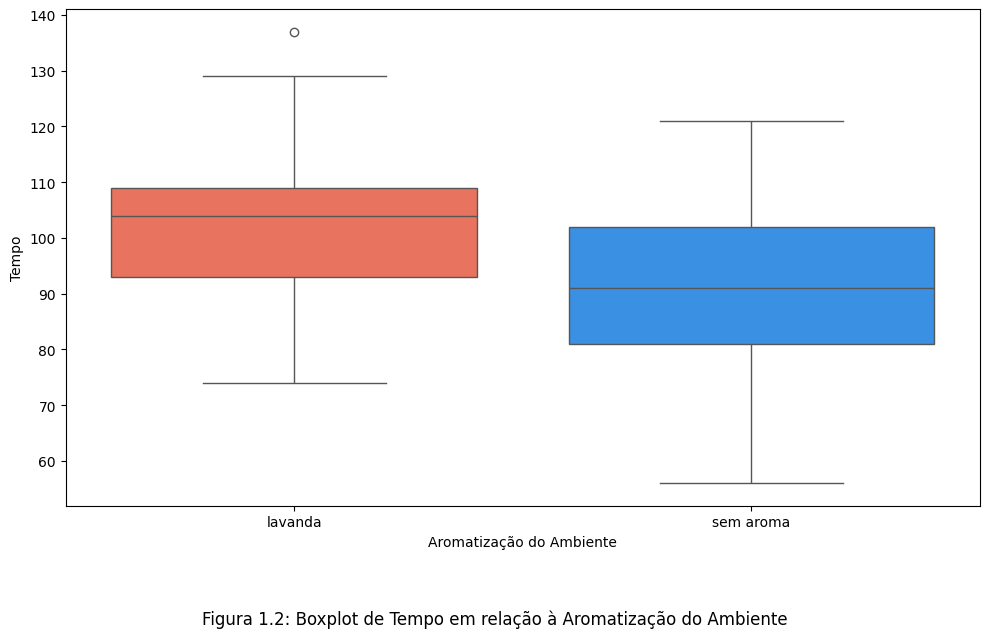

In [ ]:
# Definindo uma paleta de cores
cores = ["#FF6347", "#1E90FF"]

# Criando o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='aroma', y='Tempo', data=dadosthamara, palette=cores)

# Adicionando rótulos aos eixos
plt.xlabel('Aromatização do Ambiente')
plt.ylabel('Tempo')

# Adicionando título na parte inferior
plt.figtext(0.5, -0.05, 'Figura 1.2: Boxplot de Tempo em relação à Aromatização do Ambiente', ha='center', fontsize=12)

# Ajustando layout para o título na parte inferior
plt.tight_layout(rect=[0, 0.05, 1, 1])

# Exibindo o gráfico
plt.show()

<ipython-input-19-3d72d5ecaf2c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='aroma', y='reais', data=dadosthamara, palette=cores)


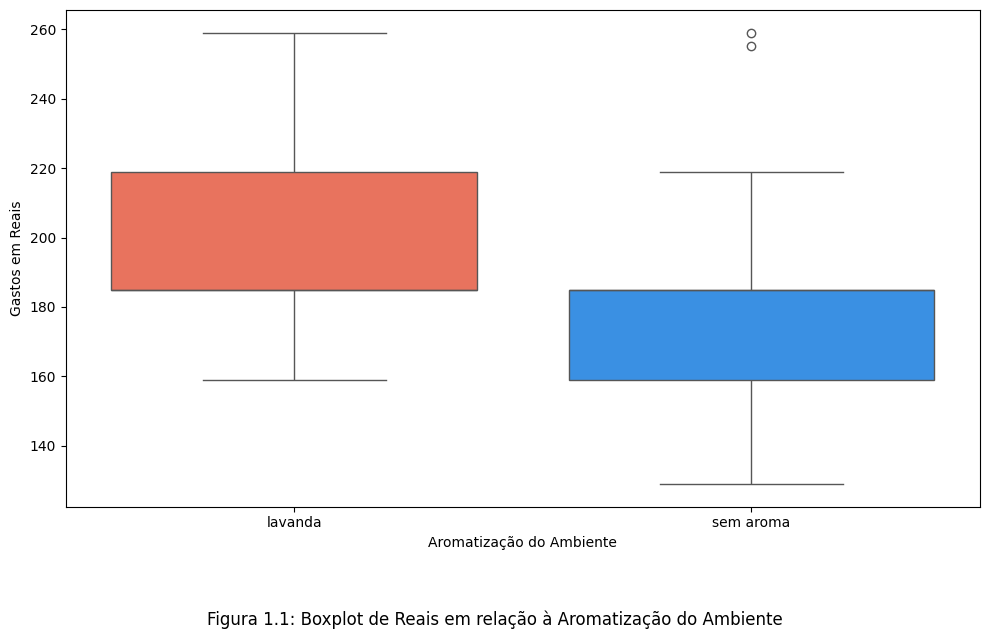

In [ ]:
# Definindo cores para os boxplots
cores = ["#FF6347", "#1E90FF"]

# Criando o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='aroma', y='reais', data=dadosthamara, palette=cores)

# Adicionando rótulos aos eixos
plt.xlabel('Aromatização do Ambiente')
plt.ylabel('Gastos em Reais')

# Adicionando título na parte inferior
plt.figtext(0.5, -0.05, 'Figura 1.1: Boxplot de Reais em relação à Aromatização do Ambiente', ha='center', fontsize=12)

# Ajustando layout para o título na parte inferior
plt.tight_layout(rect=[0, 0.05, 1, 1])


# Ambientes com Aroma de Lavanda:

Nos ambientes com aroma de lavanda, observamos uma distribuição dos gastos bastante uniforme, com a mediana dos gastos em torno de R$185,00. Isso sugere que metade dos clientes gastou menos de R$185,00, enquanto a outra metade gastou mais. Além disso, a ausência de outliers indica uma certa consistência nos padrões de gastos, com uma variabilidade moderada representada pela caixa relativamente estreita do boxplot. O primeiro quartil (Q1) e a mediana (Q2) têm o mesmo valor de R$185,00, o que sugere uma distribuição simétrica dos dados na metade inferior da distribuição, indicando uma concentração dos gastos em torno desse valor.

## Ambientes sem Aroma:

Nos ambientes sem aroma de lavanda, a distribuição dos gastos também é uniforme, com a mediana em torno de R$185,00. No entanto, há uma diferença significativa em relação aos ambientes com aroma: o terceiro quartil (Q3) também é igual à mediana (Q2), o que sugere uma concentração ainda mais forte dos gastos em torno desse valor. No entanto, foram identificados dois outliers acima do limite superior, indicando valores extremos nos gastos de alguns clientes. Apesar desses Outliers, a variabilidade dos gastos nos ambientes sem aroma também é moderada, como evidenciado pela caixa do boxplot.

## Ao comparar os dois ambientes:

Notamos que os padrões de gastos são bastante similares, com mediana e variabilidade praticamente idênticas. Tanto nos ambientes com aroma de lavanda quanto nos ambientes sem aroma, a mediana dos gastos é de aproximadamente R$185,00, indicando uma concentração significativa dos gastos em torno desse valor. Embora tenham sido identificados dois outliers nos ambientes sem aroma, a variabilidade dos gastos ainda é moderada, como evidenciado pela caixa do boxplot. Esses resultados sugerem que a presença do aroma de lavanda não teve um impacto significativo nos padrões de gastos dos clientes.


# Análise dos Ambientes

## Ambiente com Lavanda

No ambiente com lavanda, a presença desse aroma pode estar associada a uma distribuição mais uniforme dos tempos de permanência dos clientes. A mediana dos tempos de permanência é de aproximadamente 104 minutos, sugerindo que metade dos clientes passou menos de 104 minutos nesse ambiente. A presença de um outlier de 137 minutos indica que há casos de permanência significativamente mais longa. Os quartis revelam uma distribuição relativamente equilibrada dos tempos de permanência, com uma pequena dispersão entre os 25% dos clientes que passaram mais tempo. Isso sugere que o aroma de lavanda pode contribuir para uma experiência relaxante e prolongada no restaurante.

## Ambiente sem Aroma

Nos ambientes sem aroma de lavanda, os tempos de permanência dos clientes parecem ser mais consistentes em torno da mediana. A mediana dos tempos de permanência é de aproximadamente 91 minutos, indicando que metade dos clientes passou menos de 91 minutos nesse ambiente. Apesar de uma distribuição semelhante à dos ambientes com lavanda, não foram identificados outliers, indicando uma ausência de casos de permanência excepcionalmente longa. Os quartis revelam uma distribuição mais concentrada dos tempos de permanência em relação à mediana, sugerindo uma consistência nos padrões de permanência dos clientes.

## Comparação dos Ambientes

Na comparação dos ambientes, observamos diferenças marcantes nos quartis que destacam as características distintas dos dois cenários. A mediana dos tempos de permanência nos ambientes com lavanda, aproximadamente 104 minutos, é superior ao terceiro quartil (Q3) dos tempos nos ambientes sem aroma, que é de aproximadamente 102 minutos. Isso sugere que, no ambiente com lavanda, metade dos clientes permaneceu mais tempo do que 75% dos clientes nos ambientes sem aroma. Essa diferença destaca a potencial influência do aroma de lavanda na extensão da permanência dos clientes no restaurante.


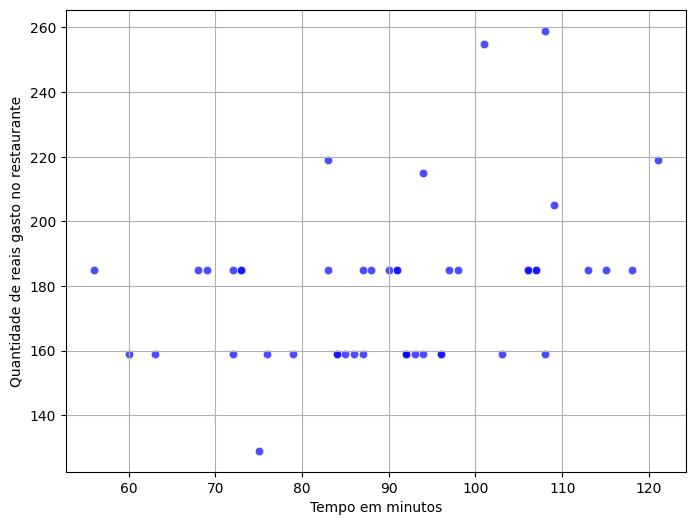

In [ ]:

# Filtrando os dados onde 'aroma' é 'sem aroma'
dados_sem_aroma = dadosthamara[dadosthamara['aroma'] == 'sem aroma']

# Gráfico de dispersão para 'Tempo' vs 'Reais'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dados_sem_aroma, x='Tempo', y='reais', color='blue', alpha=0.7)
plt.xlabel('Tempo em minutos')
plt.ylabel('Quantidade de reais gasto no restaurante')
plt.grid(True)
plt.show()

In [ ]:
# Calculando o coeficiente de correlação (r) para os dados onde o aroma é 'sem aroma'
numerator_sem_aroma = len(dados_sem_aroma) * np.sum(dados_sem_aroma['Tempo'] * dados_sem_aroma['reais']) - np.sum(dados_sem_aroma['Tempo']) * np.sum(dados_sem_aroma['reais'])
denominator_sem_aroma = np.sqrt((len(dados_sem_aroma) * np.sum(dados_sem_aroma['Tempo'] ** 2) - np.sum(dados_sem_aroma['Tempo']) ** 2) * (len(dados_sem_aroma) * np.sum(dados_sem_aroma['reais'] ** 2) - np.sum(dados_sem_aroma['reais']) ** 2))
correlation_sem_aroma = numerator_sem_aroma / denominator_sem_aroma

print("Coeficiente de correlação (r) para os dados onde o aroma é 'sem aroma':", correlation_sem_aroma)


Coeficiente de correlação (r) para os dados onde o aroma é 'sem aroma': 0.34229176189333343


# Análise da Correlação entre Tempo e Gastos

Com um coeficiente de correlação de 0,34, observamos uma correlação positiva fraca entre as duas variáveis. Isso sugere que, à medida que o tempo gasto no restaurante aumenta, geralmente o valor gasto também tende a aumentar, mas essa relação não é muito forte.


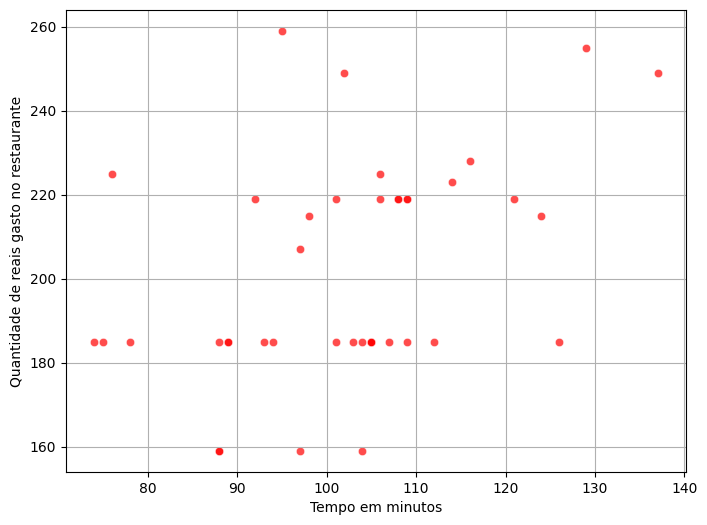

In [ ]:

# Filtrando os dados onde 'aroma' é 'lavanda'
dados_lavada = dadosthamara[dadosthamara['aroma'] == 'lavanda']

# Gráfico de dispersão para 'Tempo' vs 'Reais'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dados_lavada, x='Tempo', y='reais', color='red', alpha=0.7)
plt.xlabel('Tempo em minutos')
plt.ylabel('Quantidade de reais gasto no restaurante')
plt.grid(True)
plt.show()


In [ ]:
# Calculando o coeficiente de correlação (r) para os dados onde o aroma é 'lavanda'
numerator_lavanda = len(dados_lavanda) * np.sum(dados_lavanda['Tempo'] * dados_lavanda['reais']) - np.sum(dados_lavanda['Tempo']) * np.sum(dados_lavanda['reais'])
denominator_lavanda = np.sqrt((len(dados_lavanda) * np.sum(dados_lavanda['Tempo'] ** 2) - np.sum(dados_lavanda['Tempo']) ** 2) * (len(dados_lavanda) * np.sum(dados_lavanda['reais'] ** 2) - np.sum(dados_lavanda['reais']) ** 2))
correlation_lavanda = numerator_lavanda / denominator_lavanda

print("Coeficiente de correlação (r) para os dados onde o aroma é 'lavanda':", correlation_lavanda)



Coeficiente de correlação (r) para os dados onde o aroma é 'lavanda': 0.4180722416559942


# Análise da Correlação entre Tempo e Gastos

Com um coeficiente de correlação de 0.418, podemos observar uma correlação positiva fraca entre o tempo de permanência e o valor gasto no caso do restaurante com aroma de lavanda. Isso sugere que, à medida que o tempo gasto no restaurante aumenta, geralmente o valor gasto também tende a aumentar, mas essa relação não é muito forte.


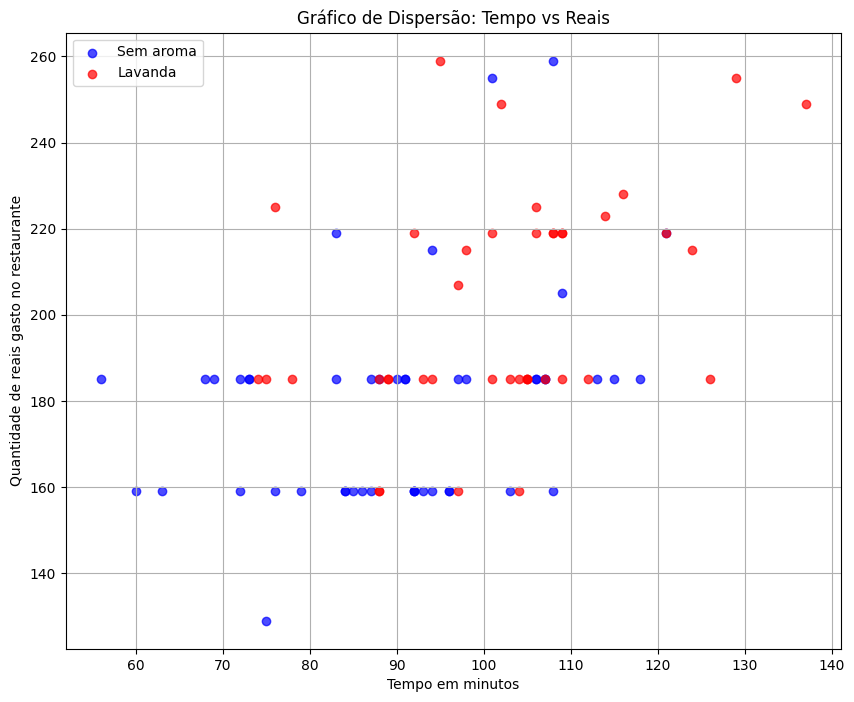

In [ ]:
import matplotlib.pyplot as plt

# Filtrando os dados
dados_sem_aroma = dadosthamara[dadosthamara['aroma'] == 'sem aroma']
dados_lavada = dadosthamara[dadosthamara['aroma'] == 'lavanda']

# Gráfico de dispersão para 'Tempo' vs 'Reais'
plt.figure(figsize=(10, 8))

# Plotando 'sem aroma'
plt.scatter(dados_sem_aroma['Tempo'], dados_sem_aroma['reais'], color='blue', alpha=0.7, label='Sem aroma')

# Plotando 'lavanda'
plt.scatter(dados_lavada['Tempo'], dados_lavada['reais'], color='red', alpha=0.7, label='Lavanda')

plt.title('Gráfico de Dispersão: Tempo vs Reais')
plt.xlabel('Tempo em minutos')
plt.ylabel('Quantidade de reais gasto no restaurante')
plt.grid(True)
plt.legend()
plt.show()


# Análise do Tempo com Lavanda

No ambiente com lavanda, o tempo médio de permanência dos clientes é de aproximadamente 102 minutos. Isso significa que, em média, os clientes passam um pouco mais de 1 hora e 40 minutos nesse ambiente. A variabilidade dos tempos de permanência, medida pelo desvio padrão de 14,3 minutos e pela variância de 204,50 minutos ao quadrado, é moderada, o que indica que os tempos de permanência dos clientes variam em torno da média, mas não de forma extrema.

Ao analisar os quartis, observamos que:
- **Primeiro quartil (Q1):** 93 minutos. Isso significa que 25% dos clientes passaram menos de 93 minutos nos ambientes com lavanda.
- **Mediana (Q2):** 104 minutos. Esse é o tempo no qual metade dos clientes passou mais e metade passou menos.
- **Terceiro quartil (Q3):** 109 minutos. Isso indica que 75% dos clientes passaram menos de 109 minutos no ambiente com lavanda.

# Conclusão	: Análise do Tempo sem Aroma

Nos ambientes sem aroma, o tempo médio de permanência dos clientes é de aproximadamente 90,23 minutos. Isso significa que, em média, os clientes passam cerca de 1 hora e 30 minutos nesses ambientes. A mediana do tempo de permanência é de 91 minutos, indicando que metade dos clientes passou menos de 91 minutos e metade passou mais.

A variabilidade dos tempos de permanência, medida pelo desvio padrão de 15,63 minutos e pela variância de 244,27 minutos ao quadrado, também é moderada. Isso sugere que os tempos de permanência dos clientes variam em torno da média, mas não de forma extrema.

Ao analisar os quartis, observamos que:
- **Primeiro quartil (Q1):** 81 minutos. Isso significa que 25% dos clientes passaram menos de 81 minutos nos ambientes sem aroma.
- **Mediana (Q2):** 91 minutos. Esse é o tempo no qual metade dos clientes passou mais e metade passou menos.
- **Terceiro quartil (Q3):** 102 minutos. Isso indica que 75% dos clientes passaram menos de 102 minutos no ambiente sem aroma.

# Análise Geral

Ao comparar os dois ambientes, observamos que os clientes tendem a permanecer um pouco mais de tempo nos ambientes com lavanda, com uma média de cerca de 102 minutos, em comparação com aproximadamente 90 minutos nos ambientes sem aroma. Isso sugere que o aroma de lavanda pode estar contribuindo para prolongar a permanência dos clientes no restaurante.

Ambos os ambientes exibem uma variabilidade moderada nos tempos de permanência, o que indica que há uma diversidade de comportamentos entre os clientes. No entanto, é importante notar que a diferença média de apenas 11,77 minutos entre os dois ambientes pode não ser tão significativa em termos práticos, especialmente considerando a variabilidade dos dados. Isso sugere que outros fatores além do aroma podem influenciar o tempo de permanência dos clientes.

Quanto aos quartis:
- Nos ambientes com lavanda, os dados mostram uma distribuição relativamente uniforme dos tempos de permanência entre os 25% mais baixos e os 50% do meio, com uma pequena dispersão entre os 25% dos clientes que passaram mais tempo.
- Nos ambientes sem aroma, os quartis indicam uma distribuição similar, com uma faixa um pouco menor entre Q1 e Q3, o que sugere uma concentração um pouco maior dos tempos de permanência em torno da mediana.

Em ambos os casos, a mediana está próxima do terceiro quartil, o que sugere que a maioria dos clientes passa um tempo relativamente consistente no restaurante, com uma pequena porcentagem de clientes que passam consideravelmente mais tempo do que a maioria. Isso indica que, apesar das diferenças nos tempos médios de permanência, a maioria dos clientes tende a ter uma experiência semelhante em termos de duração da visita, independentemente do ambiente.
